Position of node 'Tricalysia': (0, 0.35542)


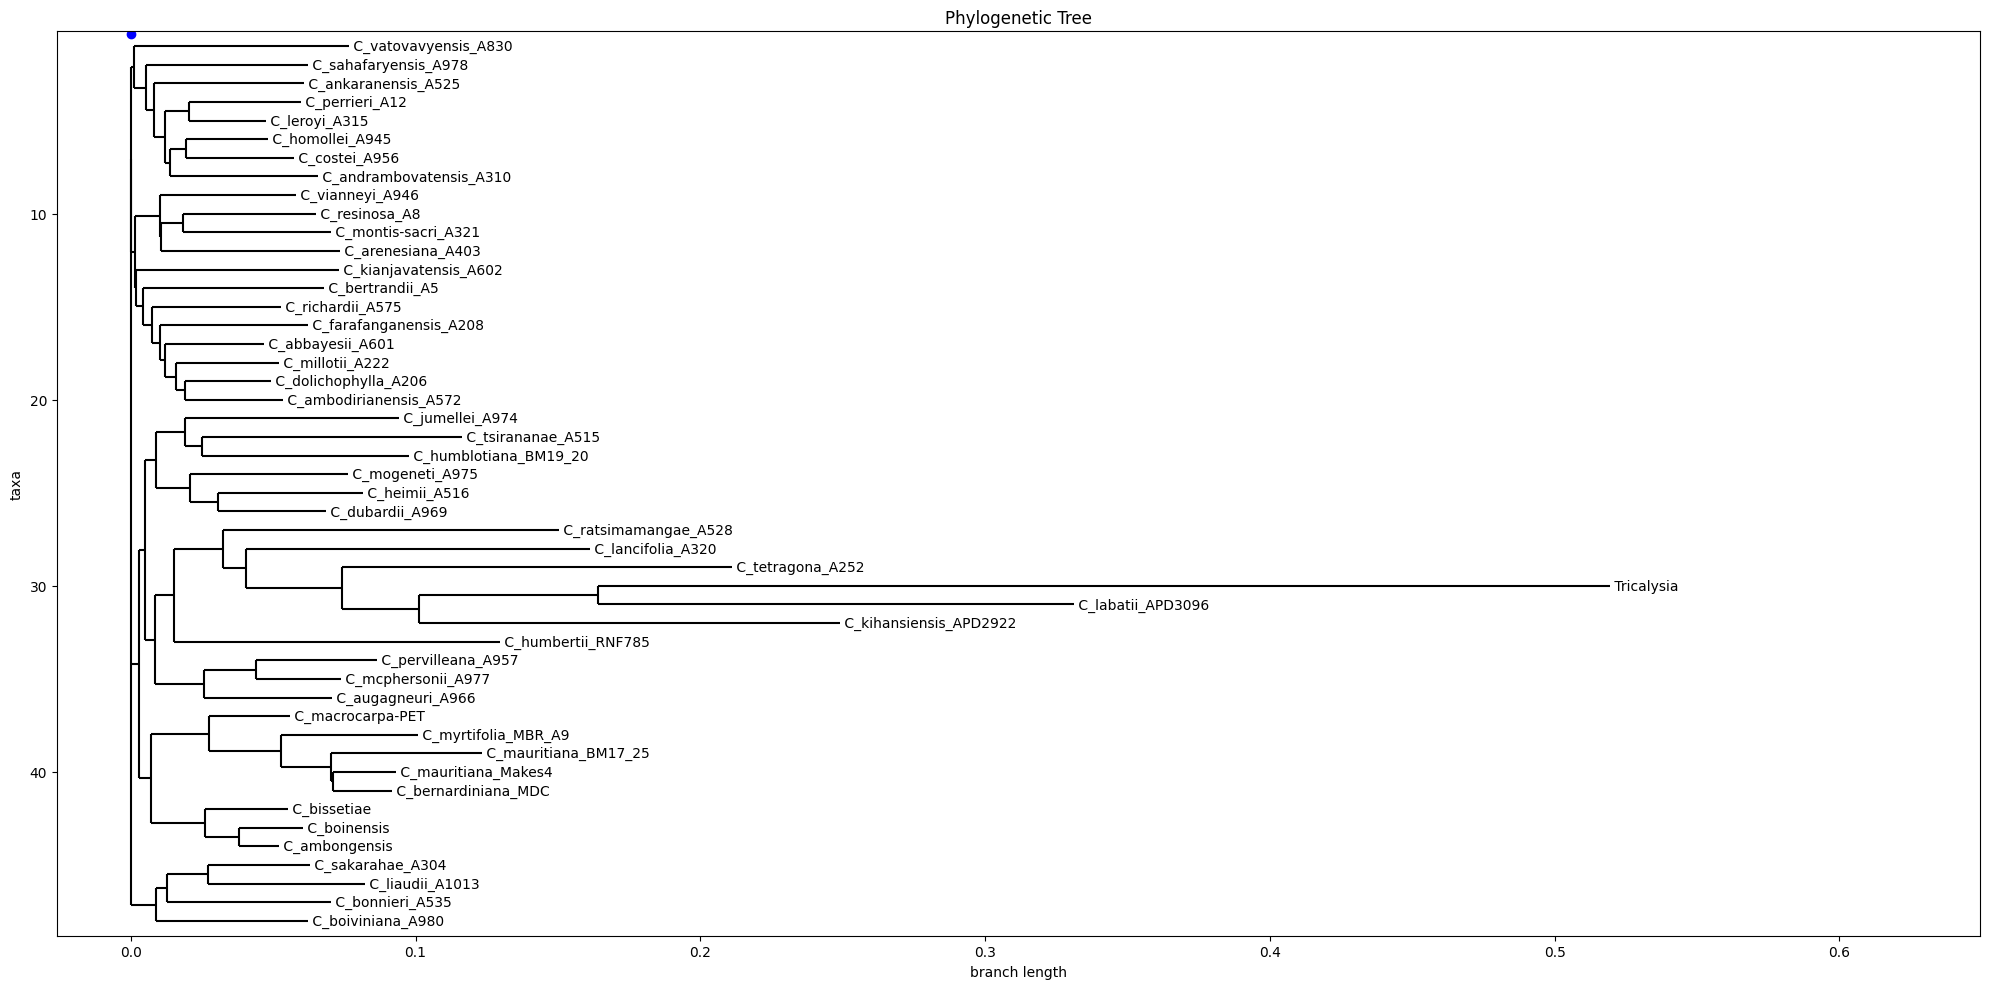

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from Bio import Phylo

# Load your tree
tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    # Check if the node is terminal and its name starts with "C_"
    if clade.is_terminal():
        return clade.name  # Return the original node name for other terminal nodes
    else:
        return None  # Return None for non-terminal nodes

def calc_node_positions(tree, x_start, x_end):
    if tree.is_terminal():
        # If leaf node, place it at the start of the branch
        x_pos = x_start
    else:
        # If internal node, place it in the middle of the branch
        x_pos = (x_start + x_end) / 2
        
        # Recursively calculate positions for child nodes
        for child in tree.clades:
            x_pos = calc_node_positions(child, x_start, x_end)
            x_start = x_pos
    
    # Set the x-position for the node
    tree.position = (x_pos, tree.branch_length)
    return x_pos

# Calculate positions for all nodes
calc_node_positions(tree.root, 0, 1)

# Define the extent of the map (centered around Madagascar)
extent = [43, 51, -27, -11]

# Create a figure for the subplot
fig = plt.figure(figsize=(20, 10))

# Add the tree subplot manually (2/3 width of the figure)
ax_tree = fig.add_subplot(111)
Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
ax_tree.set_title("Phylogenetic Tree")
ax_tree.plot()
node_positions = {clade.name: clade.position for clade in tree.find_clades()}

# Now you can access the positions of tree nodes using their names
print("Position of node 'Tricalysia':", node_positions.get('Tricalysia') )
tricalysia = node_positions.get('Tricalysia')
ax_tree.plot(tricalysia[0], tricalysia[1], 'bo')
# Graph 2
#ax2 = fig.add_subplot(122)

# Example data points
#x1, y1 = node_positions.get('Tricalysia')
#x1, y1 = 0, 0.35542  # Point in the first subplot
#x2, y2 = 0.8, 0.3  # Point in the second subplot

# Plot points in each subplot
#ax1.plot(x1, y1, 'ro', label='Point 1')
#ax2.plot(x2, y2, 'bo', label='Point 2')

# Attempt to draw a line connecting the two points across subplots
# Add an invisible subplot for the purpose of plotting the line
#ax_invisible = fig.add_subplot(111, frame_on=False)
#plt.tick_params(labelcolor="none", top=False, bottom=False, left=False, right=False)
#plt.grid(False)

# Convert the points' coordinates from their respective ax to figure coordinates
#xy1 = ax_tree.transData.transform([x1, y1])
#xy2 = ax2.transData.transform([x2, y2])
#fig_xy1 = fig.transFigure.inverted().transform(xy1)
#fig_xy2 = fig.transFigure.inverted().transform(xy2)

# Validate by plotting points in figure coordinates using plt.Line2D
#point1 = plt.Line2D([fig_xy1[0]], [fig_xy1[1]], color='green', marker='o', linestyle='None', markersize=10)
#point2 = plt.Line2D([fig_xy2[0]], [fig_xy2[1]], color='magenta', marker='o', linestyle='None', markersize=10)
#fig.add_artist(point1)
#fig.add_artist(point2)

# Draw the line in figure coordinates
#line = plt.Line2D([fig_xy1[0], fig_xy2[0]], [fig_xy1[1], fig_xy2[1]], 
#                  transform=fig.transFigure, color="green", linestyle="--")
#fig.lines.append(line)

# Draw the line in figure coordinates
#line = plt.Line2D([fig_xy1[0],fig_xy2[0]], [fig_xy1[1],fig_xy2[1]], transform=fig.transFigure, color="green", linestyle="--")
#fig.lines.extend([line])
#fig.lines.append(line)
# Customize subplots
#ax1.set_title('Subplot 1')
#ax2.set_title('Subplot 2')
#ax1.set_xlim(0, 1)
#ax1.set_ylim(0, 1)
#ax2.set_xlim(0, 1)
#ax2.set_ylim(0, 1)

# Show legend for points
#ax1.legend()
#ax2.legend()
'''
# Add the map subplot manually (1/3 width of the figure) with the projection
ax_map = fig.add_subplot(122, projection=ccrs.PlateCarree())
ax_map.set_extent(extent)

for index, row in gps.iterrows():
    ax_map.plot(row["longitude"], row["latitude"], 'bo', markersize=3)

ax_map.coastlines(resolution='10m')
ax_map.add_feature(cfeature.BORDERS)
ax_map.set_title("Species Coordinates")

last_node_position_fig = ax_tree.transData.transform(node_positions.get('Tricalysia')) 
#last_node_position_fig = ax_tree.transData.transform((0.35,42.0)) 
last_node_position_fig = fig.transFigure.inverted().transform(last_node_position_fig)

geo_point_fig = ax_map.projection.transform_point(48.38, -19.19, src_crs=ccrs.Geodetic())
geo_point_fig = ax_map.transData.transform(geo_point_fig)  # First, to ax_map's pixel coordinates
geo_point_fig = fig.transFigure.inverted().transform(geo_point_fig)  # Then to figure's coordinate system

print(geo_point_fig)
print(gps.iloc[0,1])
print(gps.iloc[0,0])
print(gps)
# Draw the line in figure coordinates
line = plt.Line2D([last_node_position_fig[0], geo_point_fig[0]], [last_node_position_fig[1], geo_point_fig[1]], transform=fig.transFigure, color="green", linestyle="--")
fig.lines.append(line)
'''
plt.tight_layout()
plt.show()

Position of node 'Tricalysia': (0.75, 29)
Marker coordinates in axes space: [0.75       0.60416667]
Display coordinates are within axes boundaries
Display coordinates of node 'Tricalysia': [1412.5         575.20833333]


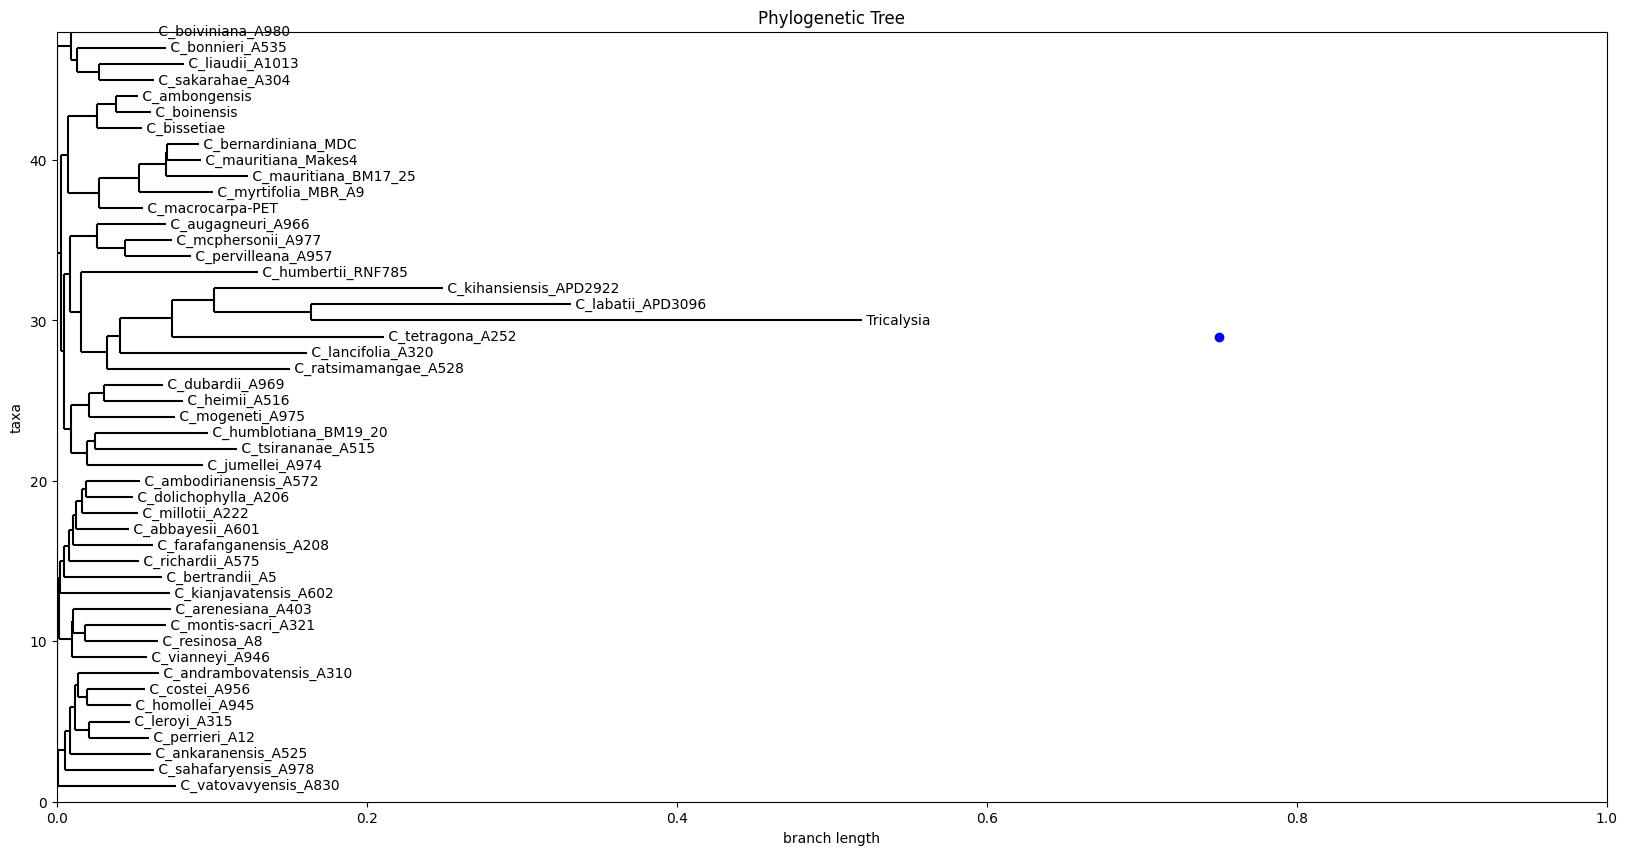

In [6]:
import matplotlib.pyplot as plt
from Bio import Phylo
import pandas as pd

# Load your tree
tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return None

def calc_node_positions(tree, x_start, x_end, y_start, y_step):
    if tree.is_terminal():
        x_pos = x_start
        y_pos = y_start
        y_start += y_step
    else:
        x_pos = (x_start + x_end) / 2
        y_pos = y_start

        child_y_start = y_start
        for child in tree.clades:
            child_x_pos, child_y_pos, y_start = calc_node_positions(child, x_start, x_end, y_start, y_step)
            x_start = child_x_pos

        y_pos = (y_start + child_y_start) / 2

    tree.position = (x_pos, y_pos)
    return x_pos, y_pos, y_start

# Calculate positions for all nodes
y_step = 1  # Adjust the y step if needed for better spacing
calc_node_positions(tree.root, 0, 1, 0, y_step)

# Create a figure for the subplot
fig, ax_tree = plt.subplots(figsize=(20, 10))

# Plot the tree
Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
ax_tree.set_title("Phylogenetic Tree")

# Set axes limits to verify the data range
ax_tree.set_xlim(0, 1)
ax_tree.set_ylim(0, max(node.position[1] for node in tree.get_terminals()) + 1)

node_positions = {clade.name: clade.position for clade in tree.find_clades()}

# Print position of node 'Tricalysia'
tricalysia = node_positions.get('Tricalysia')
print("Position of node 'Tricalysia':", tricalysia)

# If Tricalysia node exists, convert data coordinates to display coordinates
if tricalysia:
    x, y = tricalysia

    # Convert data coordinates to display coordinates
    display_coords = ax_tree.transData.transform((x, y))

    # Plot the node position on the tree plot
    ax_tree.plot(x, y, 'bo')

    # Plot a marker at the display coordinates to verify
    fig.canvas.draw()
    marker_coords = ax_tree.transAxes.inverted().transform(display_coords)
    print("Marker coordinates in axes space:", marker_coords)

    # Check if marker_coords are within the [0, 1] range in both dimensions
    if 0 <= marker_coords[0] <= 1 and 0 <= marker_coords[1] <= 1:
        print("Display coordinates are within axes boundaries")
    else:
        print("Display coordinates are outside axes boundaries")

    # Print the display coordinates
    print("Display coordinates of node 'Tricalysia':", display_coords)

plt.show()




Position of node 'Tricalysia': (0.75, 29)
Position of node 'perrieri': (0.75, 28)
Marker coordinates in axes space: [0.57      0.6122449]
Display coordinates are within axes boundaries
Display coordinates of node 'Tricalysia': [1133.5         639.57142857]
Marker coordinates in axes space: [0.3        0.59183673]
Display coordinates are within axes boundaries
Display coordinates of node 'perrieri': [715.         622.28571429]
Position of node 'perrieri': (0.875, 41)
Marker coordinates in axes space: [0.115      0.85714286]
Display coordinates are within axes boundaries
Display coordinates of node 'bissantiae': [428.25 847.  ]


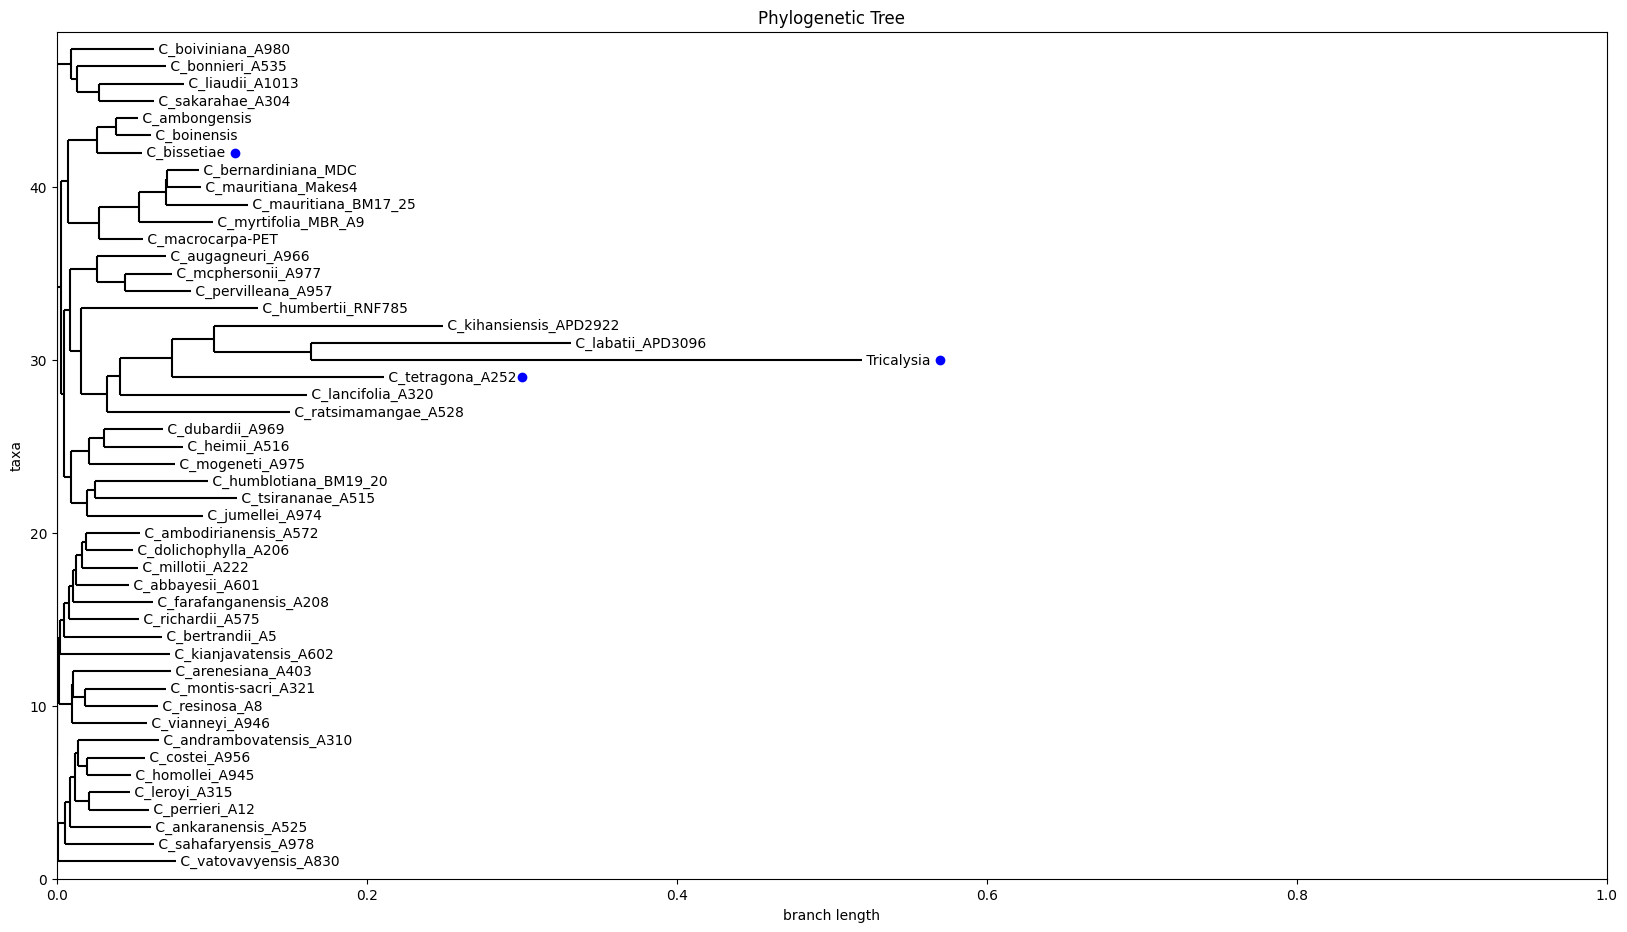

In [2]:
import matplotlib.pyplot as plt
from Bio import Phylo
import pandas as pd

# Load your tree
tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return None

def calc_node_positions(tree, x_start, x_end, y_start, y_step):
    if tree.is_terminal():
        x_pos = x_start
        y_pos = y_start
        y_start += y_step
    else:
        x_pos = (x_start + x_end) / 2
        y_pos = y_start

        child_y_start = y_start
        for child in tree.clades:
            child_x_pos, child_y_pos, y_start = calc_node_positions(child, x_start, x_end, y_start, y_step)
            x_start = child_x_pos

        y_pos = (y_start + child_y_start) / 2

    tree.position = (x_pos, y_pos)
    return x_pos, y_pos, y_start

# Calculate positions for all nodes
y_step = 1  # Adjust the y step if needed for better spacing
calc_node_positions(tree.root, 0, 1, 0, y_step)

# Create a figure for the subplot
fig, ax_tree = plt.subplots(figsize=(20, 11))

# Plot the tree
Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
ax_tree.set_title("Phylogenetic Tree")

# Set axes limits to verify the data range
ax_tree.set_xlim(0, 1)
ax_tree.set_ylim(0, max(node.position[1] for node in tree.get_terminals()) + 2)

node_positions = {clade.name: clade.position for clade in tree.find_clades()}

# Print position of node 'Tricalysia'
tricalysia = node_positions.get('Tricalysia')
print("Position of node 'Tricalysia':", tricalysia)
#perrieri = node_positions.get('C_perrieri_A12')
perrieri = node_positions.get('C_tetragona_A252')
print("Position of node 'perrieri':", perrieri)
# If Tricalysia node exists, plot directly in data coordinates
if tricalysia:
    x, y = tricalysia
    x = x - 0.18
    y = y + y_step
    # Plot the node position on the tree plot
    ax_tree.plot(x, y, 'bo')

    # Convert data coordinates to display coordinates for verification
    display_coords = ax_tree.transData.transform((x, y))
    marker_coords = ax_tree.transAxes.inverted().transform(display_coords)
    
    print("Marker coordinates in axes space:", marker_coords)

    # Verify if marker_coords are within the [0, 1] range in both dimensions
    if 0 <= marker_coords[0] <= 1 and 0 <= marker_coords[1] <= 1:
        print("Display coordinates are within axes boundaries")
    else:
        print("Display coordinates are outside axes boundaries")

    # Print the display coordinates
    print("Display coordinates of node 'Tricalysia':", display_coords)

if perrieri:
    x, y = perrieri
    x = x - 0.45
    y = y + y_step
    # Plot the node position on the tree plot
    ax_tree.plot(x, y, 'bo')

    # Convert data coordinates to display coordinates for verification
    display_coords = ax_tree.transData.transform((x, y))
    marker_coords = ax_tree.transAxes.inverted().transform(display_coords)
    
    print("Marker coordinates in axes space:", marker_coords)

    # Verify if marker_coords are within the [0, 1] range in both dimensions
    if 0 <= marker_coords[0] <= 1 and 0 <= marker_coords[1] <= 1:
        print("Display coordinates are within axes boundaries")
    else:
        print("Display coordinates are outside axes boundaries")

    # Print the display coordinates
    print("Display coordinates of node 'perrieri':", display_coords)

bissatiae = node_positions.get('C_bissetiae')
print("Position of node 'perrieri':", bissatiae)
if bissatiae:
    x, y = bissatiae
    x = x-0.76
    y = y + y_step
    # Plot the node position on the tree plot
    ax_tree.plot(x, y, 'bo')

    # Convert data coordinates to display coordinates for verification
    display_coords = ax_tree.transData.transform((x, y))
    marker_coords = ax_tree.transAxes.inverted().transform(display_coords)
    
    print("Marker coordinates in axes space:", marker_coords)

    # Verify if marker_coords are within the [0, 1] range in both dimensions
    if 0 <= marker_coords[0] <= 1 and 0 <= marker_coords[1] <= 1:
        print("Display coordinates are within axes boundaries")
    else:
        print("Display coordinates are outside axes boundaries")

    # Print the display coordinates
    print("Display coordinates of node 'bissantiae':", display_coords)

plt.show()


Position of node 'Tricalysia': (0.75, 29)
Marker coordinates in axes space for 'Tricalysia': [0.81690141 0.6122449 ]
Display coordinates for 'Tricalysia' are within axes boundaries
Display coordinates of node 'Tricalysia': [1516.1971831   639.57142857]
Position of node 'C_tetragona_A252': (0.75, 28)
Marker coordinates in axes space for 'C_tetragona_A252': [0.43661972 0.59183673]
Display coordinates for 'C_tetragona_A252' are within axes boundaries
Display coordinates of node 'C_tetragona_A252': [926.76056338 622.28571429]
Position of node 'C_bissetiae': (0.875, 41)
Marker coordinates in axes space for 'C_bissetiae': [0.17605634 0.85714286]
Display coordinates for 'C_bissetiae' are within axes boundaries
Display coordinates of node 'C_bissetiae': [522.88732394 847.        ]


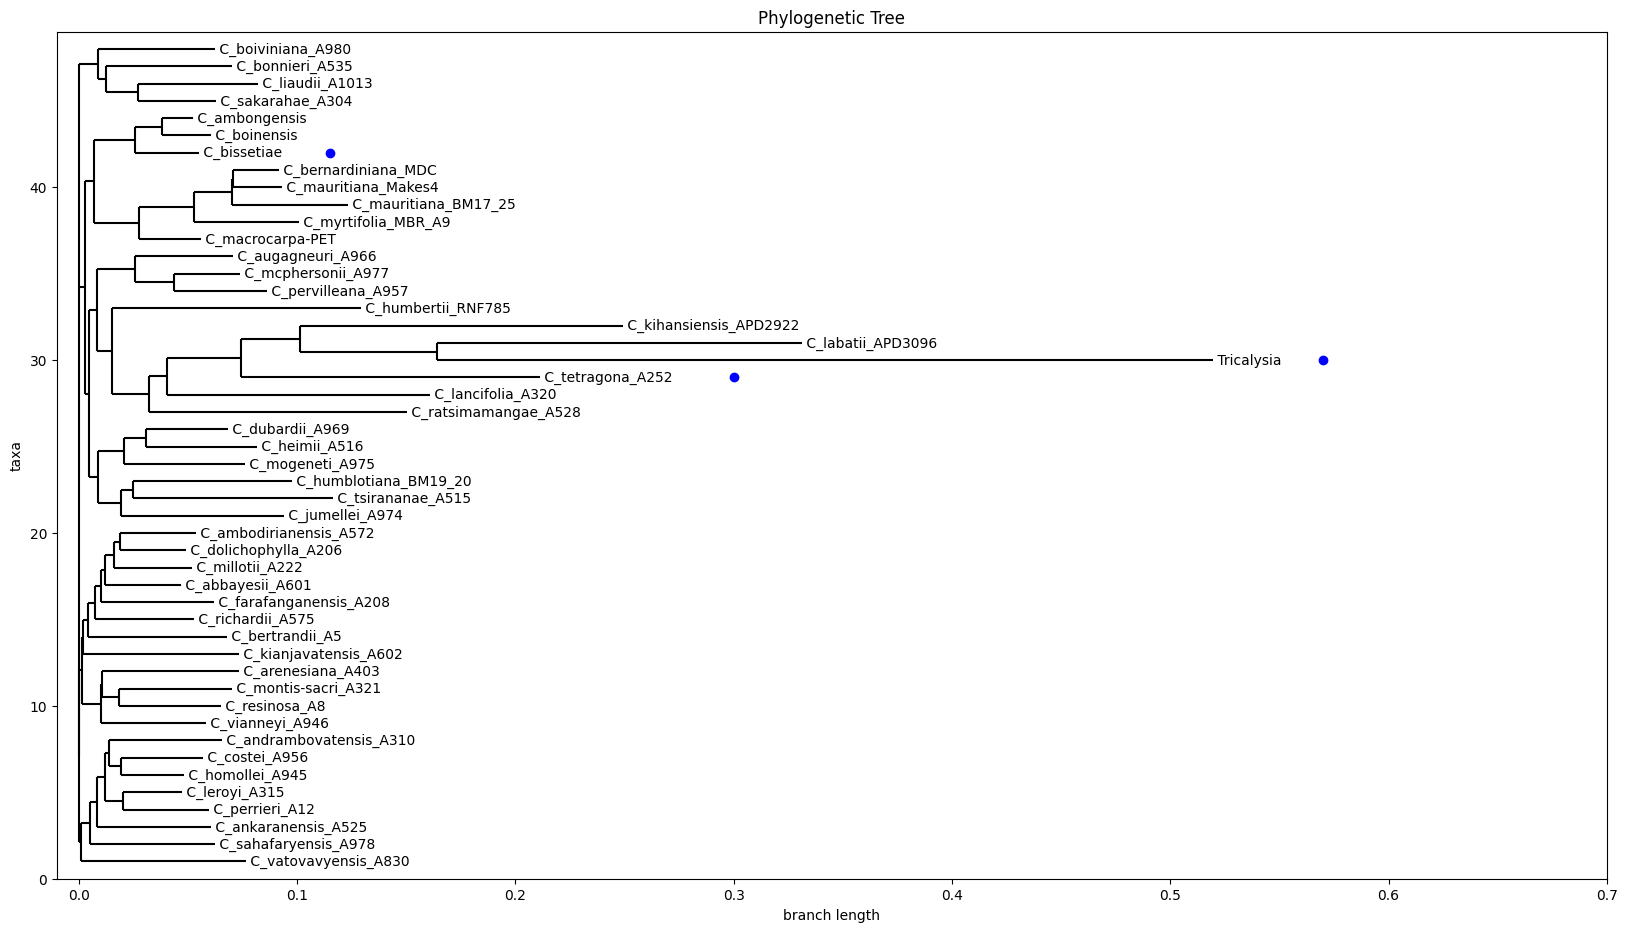

In [40]:
import matplotlib.pyplot as plt
from Bio import Phylo
import pandas as pd

# Load your tree
tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return None

def calc_node_positions(tree, x_start, x_end, y_start, y_step):
    if tree.is_terminal():
        x_pos = x_start
        y_pos = y_start
        y_start += y_step
    else:
        x_pos = (x_start + x_end) / 2
        y_pos = y_start

        child_y_start = y_start
        for child in tree.clades:
            child_x_pos, child_y_pos, y_start = calc_node_positions(child, x_start, x_end, y_start, y_step)
            x_start = child_x_pos

        y_pos = (y_start + child_y_start) / 2

    tree.position = (x_pos, y_pos)
    return x_pos, y_pos, y_start

# Calculate positions for all nodes
y_step = 1  # Adjust the y step if needed for better spacing
calc_node_positions(tree.root, 0, 1, 0, y_step)

# Create a figure for the subplot
fig, ax_tree = plt.subplots(figsize=(20, 11))

# Plot the tree
Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
ax_tree.set_title("Phylogenetic Tree")

# Set axes limits to verify the data range
ax_tree.set_xlim(-0.01, 0.7)
ax_tree.set_ylim(0, max(node.position[1] for node in tree.get_terminals()) + 2)

node_positions = {clade.name: clade.position for clade in tree.find_clades()}

def plot_adjusted_node(ax, node_name, x_offset, y_offset):
    node_position = node_positions.get(node_name)
    if node_position:
        x, y = node_position
        x += x_offset
        y += y_offset
        ax.plot(x, y, 'bo')

        # Convert data coordinates to display coordinates for verification
        display_coords = ax.transData.transform((x, y))
        marker_coords = ax.transAxes.inverted().transform(display_coords)
        
        print(f"Position of node '{node_name}':", node_position)
        print(f"Marker coordinates in axes space for '{node_name}':", marker_coords)

        # Verify if marker_coords are within the [0, 1] range in both dimensions
        if 0 <= marker_coords[0] <= 1 and 0 <= marker_coords[1] <= 1:
            print(f"Display coordinates for '{node_name}' are within axes boundaries")
        else:
            print(f"Display coordinates for '{node_name}' are outside axes boundaries")

        # Print the display coordinates
        print(f"Display coordinates of node '{node_name}':", display_coords)

# Plot nodes with adjustments
plot_adjusted_node(ax_tree, 'Tricalysia', -0.18, y_step)
plot_adjusted_node(ax_tree, 'C_tetragona_A252', -0.45, y_step)
plot_adjusted_node(ax_tree, 'C_bissetiae', -0.76, y_step)

plt.show()


Position of node 'Tricalysia': (0.675, 31.9)
Marker coordinates in axes space for 'Tricalysia': [0.675      0.66458333]
Display coordinates for 'Tricalysia' are within axes boundaries
Display coordinates of node 'Tricalysia': [1296.25        683.90208333]
Position of node 'C_tetragona_A252': (0.675, 30.8)
Marker coordinates in axes space for 'C_tetragona_A252': [0.675      0.64166667]
Display coordinates for 'C_tetragona_A252' are within axes boundaries
Display coordinates of node 'C_tetragona_A252': [1296.25        664.49166667]
Position of node 'C_bissetiae': (0.7875, 45.1)
Marker coordinates in axes space for 'C_bissetiae': [0.7875     0.93958333]
Display coordinates for 'C_bissetiae' are within axes boundaries
Display coordinates of node 'C_bissetiae': [1470.625       916.82708333]


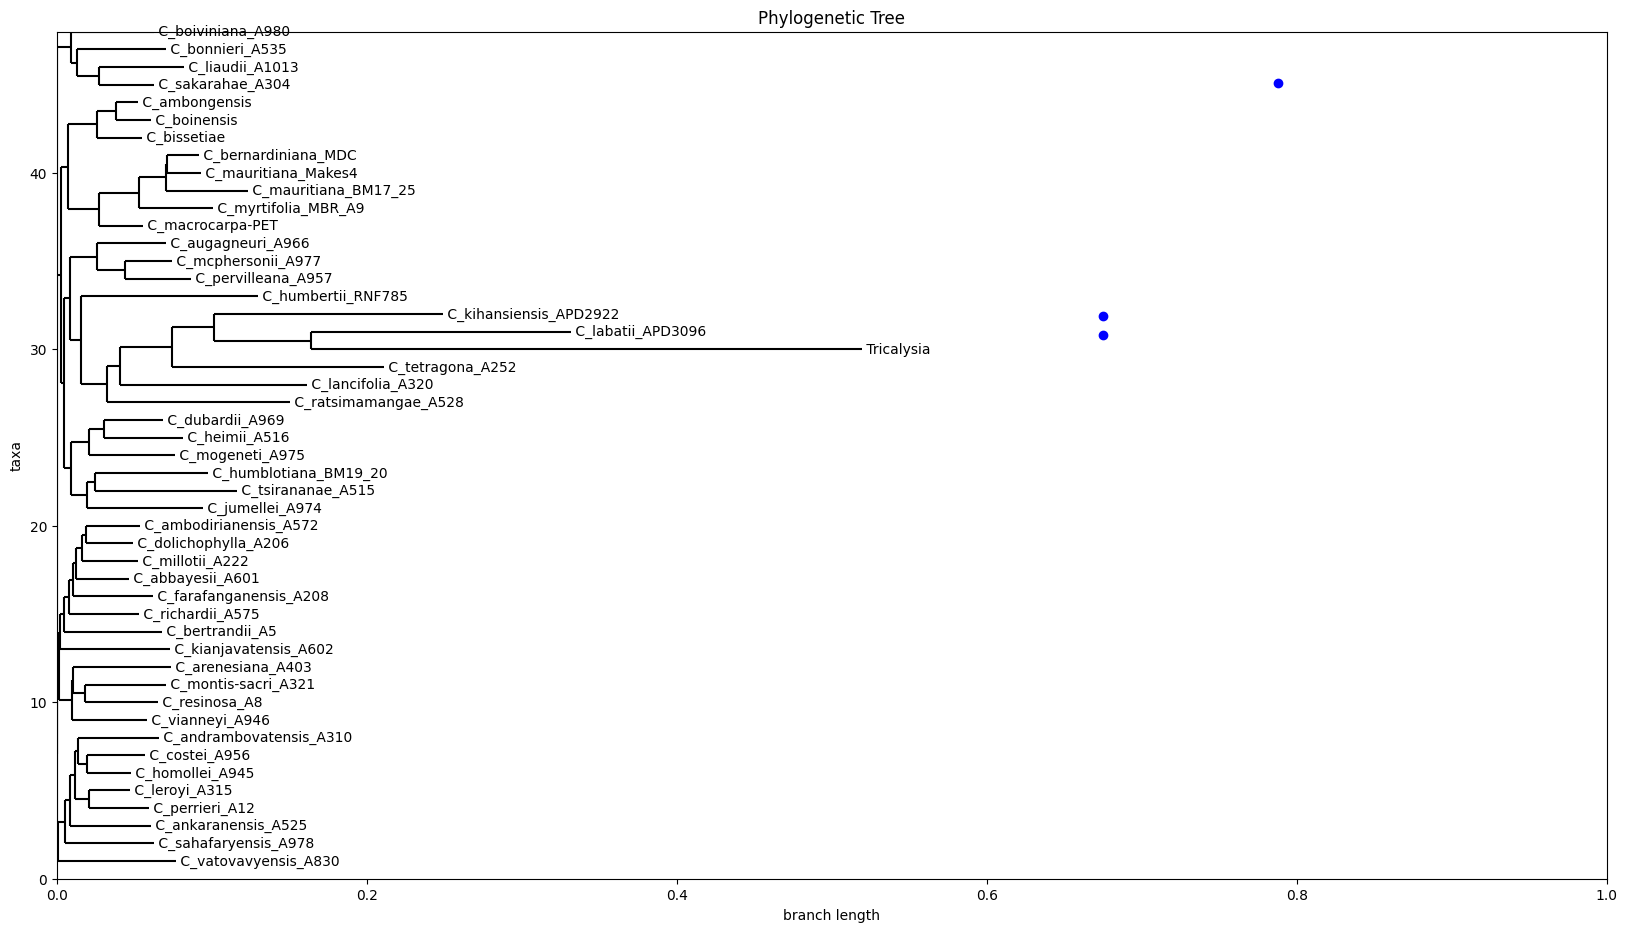

In [36]:
import matplotlib.pyplot as plt
from Bio import Phylo
import pandas as pd

# Load your tree
tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return None

def calc_node_positions(tree, x_start, x_end, y_start, y_step):
    if tree.is_terminal():
        x_pos = x_start
        y_pos = y_start
        y_start += y_step
    else:
        x_pos = (x_start + x_end) / 2
        y_pos = y_start

        child_y_start = y_start
        for child in tree.clades:
            child_x_pos, child_y_pos, y_start = calc_node_positions(child, x_start, x_end, y_start, y_step)
            x_start = child_x_pos

        y_pos = (y_start + child_y_start) / 2

    tree.position = (x_pos, y_pos)
    return x_pos, y_pos, y_start

# Calculate positions for all nodes
y_step = 1  # Adjust the y step if needed for better spacing
calc_node_positions(tree.root, 0, 1, 0, y_step)

# Create a figure for the subplot
fig, ax_tree = plt.subplots(figsize=(20, 11))

# Plot the tree
Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
ax_tree.set_title("Phylogenetic Tree")

# Set axes limits to verify the data range
ax_tree.set_xlim(0, 1)
ax_tree.set_ylim(0, max(node.position[1] for node in tree.get_terminals()) + 1)

node_positions = {clade.name: clade.position for clade in tree.find_clades()}

def adjust_positions_dynamically(node_positions, adjustment_factor=0.1):
    adjusted_positions = {}
    for name, (x, y) in node_positions.items():
        adjusted_x = x - (adjustment_factor * x)
        adjusted_y = y + (adjustment_factor * y)
        adjusted_positions[name] = (adjusted_x, adjusted_y)
    return adjusted_positions

adjusted_positions = adjust_positions_dynamically(node_positions)

def plot_adjusted_node(ax, node_name):
    node_position = adjusted_positions.get(node_name)
    if node_position:
        x, y = node_position
        ax.plot(x, y, 'bo')

        # Convert data coordinates to display coordinates for verification
        display_coords = ax.transData.transform((x, y))
        marker_coords = ax.transAxes.inverted().transform(display_coords)
        
        print(f"Position of node '{node_name}':", node_position)
        print(f"Marker coordinates in axes space for '{node_name}':", marker_coords)

        # Verify if marker_coords are within the [0, 1] range in both dimensions
        if 0 <= marker_coords[0] <= 1 and 0 <= marker_coords[1] <= 1:
            print(f"Display coordinates for '{node_name}' are within axes boundaries")
        else:
            print(f"Display coordinates for '{node_name}' are outside axes boundaries")

        # Print the display coordinates
        print(f"Display coordinates of node '{node_name}':", display_coords)

# Plot nodes with dynamic adjustments
plot_adjusted_node(ax_tree, 'Tricalysia')
plot_adjusted_node(ax_tree, 'C_tetragona_A252')
plot_adjusted_node(ax_tree, 'C_bissetiae')

plt.show()


Final adjustment factor: 0
Position of node 'Tricalysia': (0.75, 29)
Marker coordinates in axes space for 'Tricalysia': [0.75       0.60416667]
Display coordinates for 'Tricalysia' are within axes boundaries
Display coordinates of node 'Tricalysia': [1412.5         632.72916667]
Position of node 'C_tetragona_A252': (0.75, 28)
Marker coordinates in axes space for 'C_tetragona_A252': [0.75       0.58333333]
Display coordinates for 'C_tetragona_A252' are within axes boundaries
Display coordinates of node 'C_tetragona_A252': [1412.5         615.08333333]
Position of node 'C_bissetiae': (0.875, 41)
Marker coordinates in axes space for 'C_bissetiae': [0.875      0.85416667]
Display coordinates for 'C_bissetiae' are within axes boundaries
Display coordinates of node 'C_bissetiae': [1606.25        844.47916667]


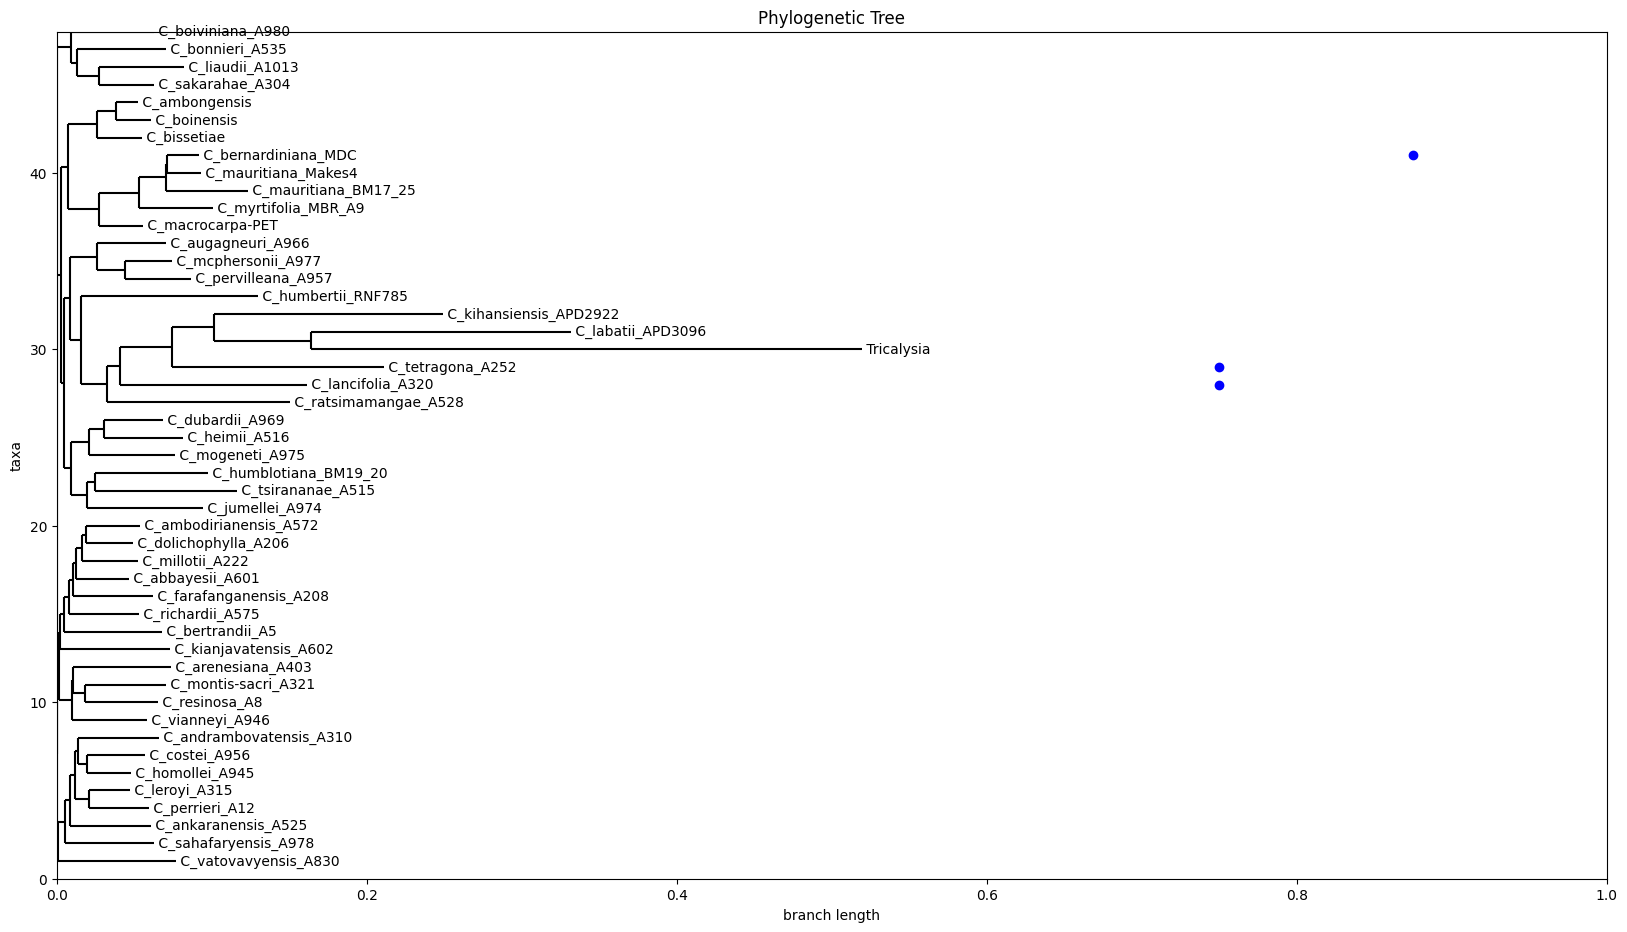